# Marketing ROI Analyzer
This notebook analyzes marketing campaign performance using SQL-style logic and Python visualizations.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [30]:
# Load dataset
df = pd.read_csv('../data/campaigns.csv')

# Group and summarize
summary = df.groupby('channel').agg({
    'ad_spend': 'sum',
    'clicks': 'sum',
    'conversions': 'sum',
    'revenue': 'sum'
}).reset_index()

# Compute metrics
summary['conversion_rate'] = (summary['conversions'] / summary['clicks']) * 100
summary['cac'] = summary['ad_spend'] / summary['conversions']
summary['roi'] = (summary['revenue'] - summary['ad_spend']) / summary['ad_spend']
summary['roas'] = summary['revenue'] / summary['ad_spend']

summary.head()

,channel,ad_spend,clicks,conversions,revenue,conversion_rate,cac,roi,roas
0,Facebook,13507,60918,4165,33301.76,6.837060,3.242977,1.465519,2.465519
1,Google,10561,58329,4532,31633.82,7.769720,2.330318,1.995343,2.995343
2,Instagram,18692,55304,4930,42600.98,8.914364,3.791481,1.279102,2.279102
3,LinkedIn,11791,48184,4049,23377.88,8.403204,2.912077,0.982688,1.982688
4,TikTok,9186,53035,3511,22789.77,6.620157,2.616349,1.480924,2.480924


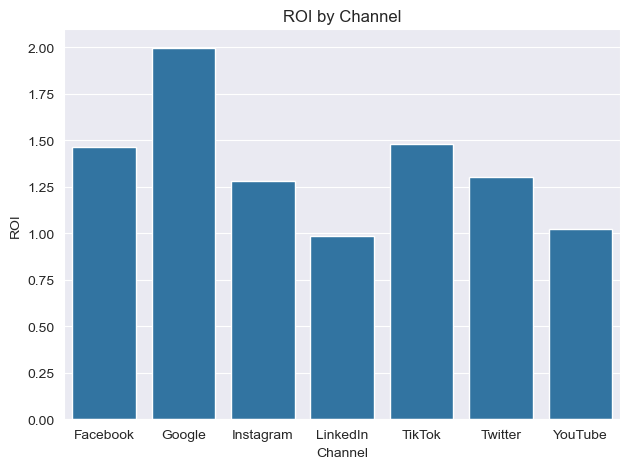

In [31]:
# ROI Visualization
sns.barplot(x='channel', y='roi', data=summary)
plt.title('ROI by Channel')
plt.ylabel('ROI')
plt.xlabel('Channel')
plt.tight_layout()
plt.savefig('../plots/roi_by_channel.png', bbox_inches='tight')
plt.show()

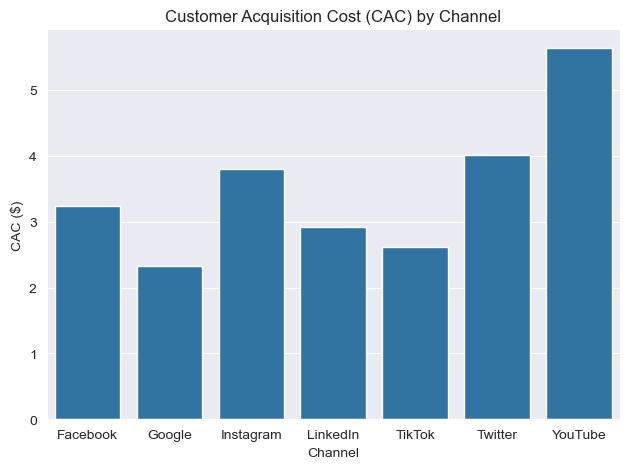

In [32]:
# CAC Visualization
sns.barplot(x='channel', y='cac', data=summary)
plt.title('Customer Acquisition Cost (CAC) by Channel')
plt.ylabel('CAC ($)')
plt.xlabel('Channel')
plt.tight_layout()
plt.savefig('../plots/cac_by_channel.png', bbox_inches='tight')
plt.show()

In [33]:
# Plotly interactive chart
fig = px.scatter(
    summary, x='ad_spend', y='roas', color='channel', size='conversions',
    hover_data=['roi'], trendline='ols', title='Ad Spend vs ROAS by Channel'
)
fig.write_html('../plots/spend_vs_roas.html')
fig.show()

In [34]:
# Print insights
print("Average ROI across all channels:", round(summary['roi'].mean(), 2))
print("\nTop Performing Channel:\n", summary.sort_values('roi', ascending=False).head(1))

Average ROI across all channels: 1.36

Top Performing Channel:
   channel  ad_spend  clicks  conversions   revenue  conversion_rate       cac  \
1  Google     10561   58329         4532  31633.82          7.76972  2.330318   

        roi      roas  
1  1.995343  2.995343  


In [35]:
# Save outputs
summary.to_csv('../data/campaign_summary.csv', index=False)